In [1]:
# Import module
from pycaret.classification import *

# Loading data from pycaret
from pycaret.datasets import get_data
data = get_data('iris') 


# Initialize setup (when using Notebook environment)
clf1 = setup(data, target = 'species')

# Initialize setup (outside of Notebook environment)
clf1 = setup(data, target = 'species', html = False)

# Initialize setup (When using remote execution such as Kaggle / GitHub actions / CI-CD pipelines)
clf1 = setup(data, target = 'species', html = False, silent = True)

Setup Succesfully Completed!
                      Description  \
0                      session_id   
1                     Target Type   
2                   Label Encoded   
3                   Original Data   
4                 Missing Values    
5               Numeric Features    
6           Categorical Features    
7               Ordinal Features    
8      High Cardinality Features    
9        High Cardinality Method    
10                   Sampled Data   
11          Transformed Train Set   
12           Transformed Test Set   
13               Numeric Imputer    
14           Categorical Imputer    
15                     Normalize    
16              Normalize Method    
17                Transformation    
18         Transformation Method    
19                           PCA    
20                    PCA Method    
21                PCA Components    
22           Ignore Low Variance    
23           Combine Rare Levels    
24          Rare Level Threshold    
25       

In [97]:
# import libraries
import pandas as pd
import sys

data = pd.read_csv('/scratch/PyCaret/Counts/LUAD_plus_LUSCNormal.MirnaSeq_Count.txt', sep = '\t' ) 
# print( data.head() )
data.set_index('ID', inplace=True) 

print(data.iloc[0:6, 0:3])

data = data.T 

#print( data.head() )

print( data.shape ) 

print( data.iloc[0:5, 0:3] )

                 TCGA-05-4244-01A  TCGA-05-4249-01A  TCGA-05-4250-01A
ID                                                                   
hsa-miR-6859-5p            0.0000            0.0000            0.5318
hsa-miR-6859-3p            0.3449            0.0000            0.0000
hsa-miR-1302               0.0000            0.0000            0.0000
hsa-miR-6723-5p            0.0000            0.0000            0.0000
hsa-miR-200b-5p            6.5533           10.3286           10.1049
hsa-miR-200b-3p          248.6807          928.1989          215.3940
(1191, 2772)
ID               hsa-miR-6859-5p hsa-miR-6859-3p hsa-miR-1302
TCGA-05-4244-01A               0          0.3449            0
TCGA-05-4249-01A               0               0            0
TCGA-05-4250-01A          0.5318               0            0
TCGA-05-4382-01A               0               0            0
TCGA-05-4384-01A               0               0            0


In [ ]:
# read list of selected mRNAs from DESeq2

In [99]:
top_genes_file = open('/scratch/PyCaret/Counts/top.genes.21.txt', "r")

top_genes = top_genes_file.read().splitlines()
print(top_genes)

for n, word in enumerate(top_genes):
    word=word.replace('.', '-')
    top_genes[n] = word

print('print mRNA names replace dot with -')
print(top_genes)

['hsa.miR.139.3p', 'hsa.miR.139.5p', 'hsa.miR.30a.3p', 'hsa.miR.30c.2.3p', 'hsa.miR.133a.3p', 'hsa.miR.133a.3p_2', 'hsa.miR.1', 'hsa.miR.1_2', 'hsa.miR.145.3p', 'hsa.miR.133b', 'hsa.miR.30a.5p', 'hsa.miR.21.5p', 'hsa.miR.195.5p', 'hsa.miR.143.3p', 'hsa.miR.135b.5p', 'hsa.miR.598.3p', 'hsa.miR.141.3p', 'hsa.miR.140.3p', 'hsa.miR.1247.3p', 'hsa.miR.141.5p', 'hsa.miR.210.3p']
print mRNA names replace dot with -
['hsa-miR-139-3p', 'hsa-miR-139-5p', 'hsa-miR-30a-3p', 'hsa-miR-30c-2-3p', 'hsa-miR-133a-3p', 'hsa-miR-133a-3p_2', 'hsa-miR-1', 'hsa-miR-1_2', 'hsa-miR-145-3p', 'hsa-miR-133b', 'hsa-miR-30a-5p', 'hsa-miR-21-5p', 'hsa-miR-195-5p', 'hsa-miR-143-3p', 'hsa-miR-135b-5p', 'hsa-miR-598-3p', 'hsa-miR-141-3p', 'hsa-miR-140-3p', 'hsa-miR-1247-3p', 'hsa-miR-141-5p', 'hsa-miR-210-3p']


In [102]:
# load design table, with tumor vs normal classification 
data_design = pd.read_csv('/scratch/PyCaret/Counts/LUAD_plus_LUSCNormal.MirnaSeq_Count_Design.txt', sep = '\t') 

# print( data.design.describe() ) 
data_design.set_index('ID', inplace=True)
print( data_design.shape )
print( data_design.iloc[0:3, 0:3] ) 



(1191, 17)
                 Tumor Type     SubjectID     SampleType
ID                                                      
TCGA-05-4244-01A       LUAD  TCGA-05-4244  Primary Tumor
TCGA-05-4249-01A       LUAD  TCGA-05-4249  Primary Tumor
TCGA-05-4250-01A       LUAD  TCGA-05-4250  Primary Tumor


In [127]:
data = data[top_genes] 

print( data.shape ) 

print( data.iloc[0:3, 0:3] ) 

print(data.dtypes )


(1191, 21)
ID               hsa-miR-139-3p hsa-miR-139-5p hsa-miR-30a-3p
TCGA-05-4244-01A         2.7593         27.248        4451.07
TCGA-05-4249-01A         1.0329         8.2629        3668.04
TCGA-05-4250-01A         1.5955        18.0825         5985.3
ID
hsa-miR-139-3p       object
hsa-miR-139-5p       object
hsa-miR-30a-3p       object
hsa-miR-30c-2-3p     object
hsa-miR-133a-3p      object
hsa-miR-133a-3p_2    object
hsa-miR-1            object
hsa-miR-1_2          object
hsa-miR-145-3p       object
hsa-miR-133b         object
hsa-miR-30a-5p       object
hsa-miR-21-5p        object
hsa-miR-195-5p       object
hsa-miR-143-3p       object
hsa-miR-135b-5p      object
hsa-miR-598-3p       object
hsa-miR-141-3p       object
hsa-miR-140-3p       object
hsa-miR-1247-3p      object
hsa-miR-141-5p       object
hsa-miR-210-3p       object
dtype: object


In [138]:
# data_numeric = data.astype(str).astype(float) 

data_numeric = data.apply( pd.to_numeric, errors='coerce' ) 

data = data_numeric 

print( data.dtypes )


ID
hsa-miR-139-3p       float64
hsa-miR-139-5p       float64
hsa-miR-30a-3p       float64
hsa-miR-30c-2-3p     float64
hsa-miR-133a-3p      float64
hsa-miR-133a-3p_2    float64
hsa-miR-1            float64
hsa-miR-1_2          float64
hsa-miR-145-3p       float64
hsa-miR-133b         float64
hsa-miR-30a-5p       float64
hsa-miR-21-5p        float64
hsa-miR-195-5p       float64
hsa-miR-143-3p       float64
hsa-miR-135b-5p      float64
hsa-miR-598-3p       float64
hsa-miR-141-3p       float64
hsa-miR-140-3p       float64
hsa-miR-1247-3p      float64
hsa-miR-141-5p       float64
hsa-miR-210-3p       float64
dtype: object


In [139]:
# only merge SampleType from data.design dataframe to data dataframe 

# data2 = pd.merge(data, data.design[["SampleType"]], left_index=True )
data2 = data.join(data_design[["SampleType"]]) 

data2.head()

,hsa-miR-139-3p,hsa-miR-139-5p,hsa-miR-30a-3p,hsa-miR-30c-2-3p,hsa-miR-133a-3p,hsa-miR-133a-3p_2,hsa-miR-1,hsa-miR-1_2,hsa-miR-145-3p,hsa-miR-133b,hsa-miR-30a-5p,hsa-miR-21-5p,hsa-miR-195-5p,hsa-miR-143-3p,hsa-miR-135b-5p,hsa-miR-598-3p,hsa-miR-141-3p,hsa-miR-140-3p,hsa-miR-1247-3p,hsa-miR-141-5p,hsa-miR-210-3p,SampleType
TCGA-05-4244-01A,2.7593,27.2480,4451.074,6.8982,5.5186,5.5186,8.9677,8.6228,18.9701,0.3449,16312.560,541087.9,32.4216,17632.19,334.5635,5.1737,1253.4060,238.6783,6.2084,280.4125,1853.2060,Primary Tumor
TCGA-05-4249-01A,1.0329,8.2629,3668.038,8.9515,2.4100,2.4100,11.3615,11.0172,14.8044,0.0000,15395.840,414415.7,12.7386,23037.65,235.8369,16.1815,528.4812,388.3562,5.8529,267.1670,222.0654,Primary Tumor
TCGA-05-4250-01A,1.5955,18.0825,5985.295,14.8914,1.5955,1.5955,11.7004,10.6367,38.2923,0.0000,19815.190,557526.9,22.3372,41931.63,121.7907,14.3596,1146.6410,303.6790,15.4233,345.1623,2019.3850,Primary Tumor
TCGA-05-4382-01A,3.2936,20.4206,2076.313,9.2222,4.6111,4.6111,3.2936,3.2936,32.2777,0.0000,9240.645,393332.1,26.3491,38192.42,6.5873,7.2460,1324.0440,490.0941,3.2936,533.5701,2778.5170,Primary Tumor
TCGA-05-4384-01A,35.3987,38.6851,7721.054,54.9291,5.3521,5.3521,20.1876,20.1876,41.3142,1.1268,18384.710,230144.2,37.1828,167363.60,36.2438,11.5492,573.0462,647.2239,4.9765,593.3277,499.0563,Primary Tumor


In [140]:
print( data2.dtypes)


hsa-miR-139-3p       float64
hsa-miR-139-5p       float64
hsa-miR-30a-3p       float64
hsa-miR-30c-2-3p     float64
hsa-miR-133a-3p      float64
hsa-miR-133a-3p_2    float64
hsa-miR-1            float64
hsa-miR-1_2          float64
hsa-miR-145-3p       float64
hsa-miR-133b         float64
hsa-miR-30a-5p       float64
hsa-miR-21-5p        float64
hsa-miR-195-5p       float64
hsa-miR-143-3p       float64
hsa-miR-135b-5p      float64
hsa-miR-598-3p       float64
hsa-miR-141-3p       float64
hsa-miR-140-3p       float64
hsa-miR-1247-3p      float64
hsa-miR-141-5p       float64
hsa-miR-210-3p       float64
SampleType            object
dtype: object


In [3]:
from platform import python_version

print(python_version())

import sys
sys.executable

3.6.10


'/home/jdu/anaconda3/envs/pyCaret/bin/python'

In [141]:
# import classification module
from pycaret.classification import *

# init setup
clf1 = setup(data2, target = 'SampleType')

# return best model
best = compare_models()

# return best model based on Recall
best = compare_models(sort = 'Recall') #default is 'Accuracy'

# compare specific models
best_specific = compare_models(whitelist = ['dt','rf','xgboost'])

# blacklist certain models
best_specific = compare_models(blacklist = ['catboost','svm'])

# return top 3 models based on Accuracy
top3 = compare_models(n_select = 3)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.9808,0.9963,0.9809,0.9853,0.9829,0.9609,0.9613,0.2510
1,Light Gradient Boosting Machine,0.9784,0.9962,0.9766,0.9854,0.9808,0.9561,0.9567,0.2095
2,Ada Boost Classifier,0.9760,0.9953,0.9787,0.9790,0.9786,0.9511,0.9517,0.1352
3,CatBoost Classifier,0.9760,0.9966,0.9788,0.9792,0.9788,0.9512,0.9516,2.2615
4,Random Forest Classifier,0.9724,0.9956,0.9703,0.9807,0.9754,0.9439,0.9443,0.1185
5,Gradient Boosting Classifier,0.9724,0.9954,0.9745,0.9771,0.9755,0.9439,0.9446,0.3514
6,Extreme Gradient Boosting,0.9724,0.9958,0.9788,0.9729,0.9756,0.9438,0.9443,0.0790
7,Logistic Regression,0.9652,0.9950,0.9703,0.9695,0.9692,0.9291,0.9309,0.0552
8,Ridge Classifier,0.9628,0.0000,0.9746,0.9613,0.9675,0.9239,0.9251,0.0133
9,Linear Discriminant Analysis,0.9628,0.9922,0.9746,0.9613,0.9675,0.9239,0.9251,0.0074


In [7]:
# load data (replace this part with your own script)
# Create Model
# train custom model
import numpy as np 
# pip install gplearn

from gplearn.genetic import SymbolicClassifier

In [142]:
# import classification module
from pycaret.classification import * 
import numpy as np

# init setup
clf1 = setup(data2, target = 'SampleType')

# train logistic regression model
lr = create_model('lr') #lr is the id of the model

# check the model library to see all models
models()

# train rf model using 5 fold CV
rf = create_model('rf', fold = 5)

# train svm model without CV
svm = create_model('svm', cross_validation = False)

# train xgboost model with max_depth = 10
xgboost = create_model('xgboost', max_depth = 10)

# train xgboost model on gpu
# xgboost_gpu = create_model('xgboost', tree_method = 'gpu_hist', gpu_id = 0) #0 is gpu-id

# train multiple lightgbm models with n learning_rate
lgbms = [create_model('lightgbm', learning_rate = i) for i in np.arange(0.1,1,0.1)]



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9643,0.9891,0.9574,0.9783,0.9677,0.9278,0.9280
1,0.9881,0.9965,0.9792,1.0000,0.9895,0.9758,0.9761
2,0.9643,0.9902,0.9792,0.9592,0.9691,0.9268,0.9271
3,0.9518,0.9923,0.9149,1.0000,0.9556,0.9032,0.9074
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9518,0.9941,0.9574,0.9574,0.9574,0.9019,0.9019
6,0.9759,0.9923,1.0000,0.9592,0.9792,0.9506,0.9518
7,0.9518,0.9970,0.9362,0.9778,0.9565,0.9025,0.9036
8,0.9759,0.9894,0.9787,0.9787,0.9787,0.9509,0.9509
9,0.9639,0.9900,0.9574,0.9783,0.9677,0.9267,0.9269


In [143]:
# train custom model
from gplearn.genetic import SymbolicClassifier
symclf = SymbolicClassifier(generations=20)
sc = create_model(symclf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9167,0.9833,0.8511,1.0000,0.9195,0.8343,0.8460
1,0.9524,0.9896,0.9792,0.9400,0.9592,0.9021,0.9032
2,0.9286,0.9873,0.9583,0.9200,0.9388,0.8531,0.8542
3,0.9518,0.9734,0.9149,1.0000,0.9556,0.9032,0.9074
4,0.5663,0.9858,1.0000,0.5663,0.7231,0.0000,0.0000
5,0.5422,0.9427,0.9574,0.5556,0.7031,-0.0478,-0.1375
6,0.5783,0.9758,1.0000,0.5732,0.7287,0.0313,0.1262
7,0.9157,0.9988,0.8511,1.0000,0.9195,0.8321,0.8441
8,0.6024,0.9811,1.0000,0.5875,0.7402,0.0933,0.2213
9,0.5783,0.9746,1.0000,0.5732,0.7287,0.0313,0.1262


In [151]:
## tune the model
data2

,hsa-miR-139-3p,hsa-miR-139-5p,hsa-miR-30a-3p,hsa-miR-30c-2-3p,hsa-miR-133a-3p,hsa-miR-133a-3p_2,hsa-miR-1,hsa-miR-1_2,hsa-miR-145-3p,hsa-miR-133b,...,hsa-miR-195-5p,hsa-miR-143-3p,hsa-miR-135b-5p,hsa-miR-598-3p,hsa-miR-141-3p,hsa-miR-140-3p,hsa-miR-1247-3p,hsa-miR-141-5p,hsa-miR-210-3p,SampleType
TCGA-05-4244-01A,2.7593,27.2480,4451.074,6.8982,5.5186,5.5186,8.9677,8.6228,18.9701,0.3449,...,32.4216,17632.19,334.5635,5.1737,1253.4060,238.6783,6.2084,280.4125,1853.2060,Primary Tumor
TCGA-05-4249-01A,1.0329,8.2629,3668.038,8.9515,2.4100,2.4100,11.3615,11.0172,14.8044,0.0000,...,12.7386,23037.65,235.8369,16.1815,528.4812,388.3562,5.8529,267.1670,222.0654,Primary Tumor
TCGA-05-4250-01A,1.5955,18.0825,5985.295,14.8914,1.5955,1.5955,11.7004,10.6367,38.2923,0.0000,...,22.3372,41931.63,121.7907,14.3596,1146.6410,303.6790,15.4233,345.1623,2019.3850,Primary Tumor
TCGA-05-4382-01A,3.2936,20.4206,2076.313,9.2222,4.6111,4.6111,3.2936,3.2936,32.2777,0.0000,...,26.3491,38192.42,6.5873,7.2460,1324.0440,490.0941,3.2936,533.5701,2778.5170,Primary Tumor
TCGA-05-4384-01A,35.3987,38.6851,7721.054,54.9291,5.3521,5.3521,20.1876,20.1876,41.3142,1.1268,...,37.1828,167363.60,36.2438,11.5492,573.0462,647.2239,4.9765,593.3277,499.0563,Primary Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-X7-A8D6-11A,152.2154,790.4087,4308.962,108.8870,43.3284,43.3284,100.2419,98.5953,112.2833,3.8080,...,51.6647,193511.70,0.5146,12.2472,49.1947,5272.9940,24.3915,30.7724,88.0976,Solid Tissue Normal
TCGA-X7-A8D7-11A,36.3611,192.4105,1433.686,18.9381,17.8775,17.8775,14.0899,13.7869,47.8754,4.0906,...,54.5416,45386.16,0.9090,32.7249,265.4356,2863.7350,6.3632,218.7723,258.6180,Solid Tissue Normal
TCGA-Y8-A8RY-11A,17.4736,142.0815,51956.790,475.9391,2.7883,2.7883,4.3374,4.2135,16.6061,0.2479,...,11.8350,21737.86,7.3117,13.3221,319.2962,699.1304,1.4252,87.4920,579.9133,Solid Tissue Normal
TCGA-YB-A89D-11A,14.3284,56.8414,1573.767,28.3420,9.6048,9.6048,33.6955,33.6955,45.8195,0.4724,...,33.2231,125773.20,31.9635,17.7925,224.5314,868.6814,13.8561,61.8800,241.8515,Solid Tissue Normal


In [144]:
# import classification module
from pycaret.classification import *

# init setup
clf1 = setup(data2, target = 'SampleType')

# train a decision tree model
dt = create_model('dt')

# tune hyperparameters of decision tree
tuned_dt = tune_model(dt)

# tune hyperparameters with increased n_iter
tuned_dt = tune_model(dt, n_iter = 50)

# tune hyperparameters to optimize AUC
tuned_dt = tune_model(dt, optimize = 'AUC') #default is 'Accuracy'

# tune hyperparameters with custom_grid
params = {"max_depth": np.random.randint(1, (len(data.columns)*.85),20),
          "max_features": np.random.randint(1, len(data.columns),20),
          "min_samples_leaf": [2,3,4,5,6],
          "criterion": ["gini", "entropy"]
          }

tuned_dt_custom = tune_model(dt, custom_grid = params)

# tune multiple models dynamically
top3 = compare_models(n_select = 3)
tuned_top3 = [tune_model(i) for i in top3]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9524,0.9747,0.9362,0.9778,0.9565,0.9039,0.9050
1,0.9524,0.9919,0.9792,0.9400,0.9592,0.9021,0.9032
2,0.9881,0.9994,1.0000,0.9796,0.9897,0.9756,0.9759
3,0.9759,0.9965,1.0000,0.9592,0.9792,0.9506,0.9518
4,0.9518,0.9894,0.9574,0.9574,0.9574,0.9019,0.9019
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9880,0.9994,0.9787,1.0000,0.9892,0.9756,0.9758
7,0.9639,0.9953,0.9574,0.9783,0.9677,0.9267,0.9269
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9880,1.0000,0.9787,1.0000,0.9892,0.9756,0.9758


In [ ]:
## Ensemble Model

In [ ]:
# import classification module
from pycaret.classification import *

# init setup
clf1 = setup(data2, target = 'SampleType')

# train a decision tree model
dt = create_model('dt')

# train a bagging classifier on dt
bagged_dt = ensemble_model(dt, method = 'Bagging')

# train a adaboost classifier on dt with 100 estimators
boosted_dt = ensemble_model(dt, method = 'Boosting', n_estimators = 100)

# train a votingclassifier on all models in library
blender = blend_models()

# train a voting classifier on specific models
dt = create_model('dt')
rf = create_model('rf')
adaboost = create_model('ada')
blender_specific = blend_models(estimator_list = [dt,rf,adaboost], method = 'soft')

# train a voting classifier dynamically
blender_top5 = blend_models(compare_models(n_select = 5))

# train a stacking classifier
stacker = stack_models(estimator_list = [dt,rf], meta_model = adaboost)

# stack multiple models dynamically
top7 = compare_models(n_select = 7)
stacker = stack_models(estimator_list = top7[1:], meta_model = top7[0])

In [ ]:
# Predict Model 

In [ ]:
# train a catboost model
catboost = create_model('catboost')

# predict on holdout set (when no data is passed)
pred_holdout = predict_model(catboost)

# predict on new dataset
new_data = pd.read_csv('new-data.csv')
pred_new = predict_model(catboost, data = new_data)  

In [ ]:
# Plot Model 



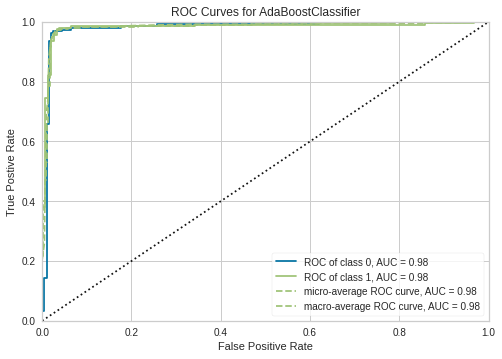

In [146]:
# import classification module
from pycaret.classification import *

# init setup
clf1 = setup(data2, target = 'SampleType')

# train adaboost model
adaboost = create_model('ada')

# AUC plot
plot_model(adaboost, plot = 'auc')



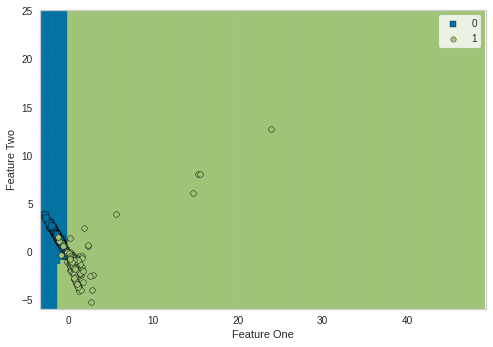

In [147]:
# Decision Boundary
plot_model(adaboost, plot = 'boundary')



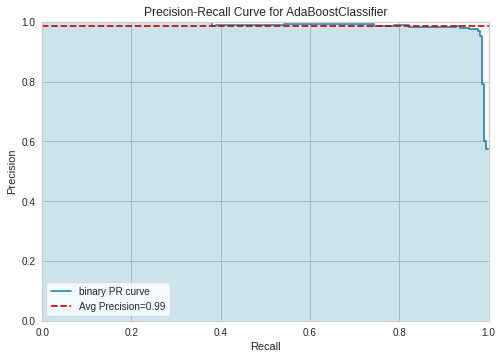

In [148]:
# Precision Recall Curve
plot_model(adaboost, plot = 'pr')



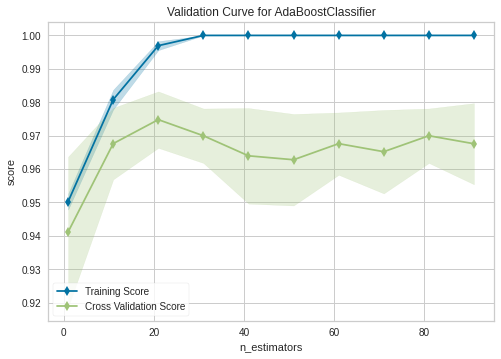

In [149]:
# Validation Curve
plot_model(adaboost, plot = 'vc')

In [150]:
evaluate_model(adaboost)  

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…